# Desafio Oficina de aprendizado de máquinas da comunidade AI Girls

## Grupo C

### Integrantes : 
Ana Maria Bender, Klara Narumi Maia e Larissa Rocha

### Data:
01/05/2021

# Proposta do Desafio

#### A escola chamada Todos Unidos solicitou para a nossa consultoria AI Girls, que seja construída uma inteligencia artificial que:

* possa calcular a nota final dos alunos de ensino médio;
* identifique quais pontos influenciam nas notas dos alunos.

#### O objetivo é que com esta inteligência artificial possibilite que a escola foque em outras questões relacionadas à melhoria da educação de seus alunos. 

## Perguntas parar entender o problema da escola:

### 1 Objetivos gerais e os objetivos especificos

O objetivo geral é predizer a nota final do aluno baseado em alguns aspectos, como demográficos, sociais, hábitos do alunos e suas notas prévias. Os objetivos especificos são descobrir quais dessas características colaboram mais com a nota final e se essas variavéis influenciam de forma positiva ou negativa.

### 2 A importância de resolver o problema

A partir dos resultados desta análise é possível criar planos de ações para mitigar que alunos percam um ano de estudos focando em estratégias de melhorias de certos aspéctos a serem descobertos pelo modelo. 


### 3 Como esta solução afetaria a empresa

A escola poderia desprender uma atenção especializada para certos grupos de alunos com caracteristicas específicas, como uma medida preventiva de reprovação escolar ou de baixo rendimento escolar. Isso pode aumentar a confiança dos pais e alunos ao escolher uma escola que se preocupa com o desenvolvimento do seu aluno e procura soluções inteligentes para evitar possiveis reprovações e até mesmo a evasão escolar por este aluno nao se sentir entendido ou acolhido com suas especificidades nas atividades escolares.

# Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.font_manager import FontProperties
from matplotlib import pyplot

from sklearn.preprocessing import LabelEncoder

# Banco dos dados

#### Link do banco de dados: https://www.kaggle.com/dipam7/student-grade-prediction

## Features

* school: Escola do aluno (binário: 'GP' Gabriel Pereira ou 'MS' Mousinho da Silveira)
* sex: sexo do aluno (binário: 'F' Feminino ou 'M' masculino)
* age: idade do aluno (numérico: de 15 a 22)
* address: tipo de endereço residencial do aluno (binário: 'U' urbano ou 'R' rural)
* famsize: tamanho da família (binário: 'LE3' menor ou igual a 3 ou 'GT3' maior que 3)
* Pstatus: status de coabitação dos pais (binário: 'T' vivendo juntos ou 'A' separados)
* Medu: escolaridade da mãe (numérico: 0 - nenhuma, 1 - ensino fundamental (4º ano), 2 - 5º ao 9º ano, 3 - ensino médio, 4 - ensino superior )
* Fedu: escolaridade do pai (numérico: 0 - nenhuma, 1 - ensino fundamental (4º ano), 2 - 5º ao 9º ano, 3 - ensino médio, 4 - ensino superior 
* Mjob: trabalho da mãe (nominal: 'professora', 'cuidados de saúde' relacionados, 'serviços' civis(administrativo ou policial), 'em_casa' ou 'outro')
* Fjob: trabalho do pai (nominal: 'professora', 'cuidados de saúde' relacionados, 'serviços' civis(administrativo ou policial), 'em_casa' ou 'outro')
* reason: razão para escolher esta escola (nominal: perto de 'casa', 'reputação' da escola, preferência de 'curso' ou 'outra)
* guardian: tutor do aluno (nominal: 'mãe', 'pai' ou 'outro')
* traveltime: tempo de viagem de casa até a escola (numérico: 1 - 1 hora)
* studytime: tempo de estudo semanal (numério 1 - 10 horas)
* failures: número de falhas de classe anteriores (numéricos: n se 1<= n < 3, senão 4)
* schoolsup: suporte educacional extra (binário: sim ou não)
* famsup: apoio educacional à família (binário: sim ou não
* paid: aulas extras pagas dentro da disciplina (Matemática ou Português) (binário: sim ou não)
* activities: atividades extracurriculares (binária: sim ou não)
* nursery: frequentou creche (binário: sim ou não)
* higher: quer fazer ensino superior (binário: sim ou não)
* internet: tem acesso à internet em casa (binário: sim ou não)
* romantic: com um relacionamento romântico (binário: simm ou não)
* famrel: qualidade das relações familiares (numérico de 1- muito ruim a 5-excelente)
* freetime: tempo livre depois da escola (numérico de 1 - muito baixo a 5- muito alto)
* goout: sair com amigos (numérico: de 1 - muito baixo a 5 - muito alto)
* Dalc: consumo de álcool durante o trabalho (numérico: de 1 - muito baixo a 5 - muito alto)
* Walc: consumo de álcool no fim de semana (numérico: de 1 - muito baixo a 5 - muito alto) 
* health: estado de saúde atual (numérico: de 1- muito ruim a 5- muito bom)
* absences: numero de faltas escolares (numérico de 0 a 93)
* G1: nota grau 1 (numérico: 0-20)
* G2: nota grau 2 (numérico: 0-20)
* G3: nota final (numérico: 0-20)

In [2]:
pd.set_option('display.max_columns', None)
# importar o banco de dados
df_alunos = pd.read_csv('data/student-mat.csv',low_memory=False)

In [3]:
# (linhas, colunas)
df_alunos.shape

(395, 33)

In [4]:
df_alunos.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother           2          2         0       yes     no   no   
1  course   father           1          2         0        no    yes   no   
2   other   mother           1          2         3       yes     no  yes   
3    home   mother           1          3         0        no    yes  yes   
4    home   father           1          2         0        no    yes  yes   

  activities nursery higher internet romantic  famrel  freetime  goout  Dalc  \
0         no     yes    yes       no       no       4         3      4     1   
1         no      no    yes      yes       no       5         3      3     1   
2         no     yes    yes      yes       no       4         3      2     2   
3        yes     yes    yes      yes      yes       3         2      2     1   
4         no     yes    yes       no       no       4         3      2     1   

   Walc  health  absences  G1  G2  G3  
0     1       3         6   5   6   6  
1     1       3         4   5   5   6  
2     3       3        10   7   8  10  
3     1       5         2  15  14  15  
4     2       5         4   6  10  10

## Verificação dos dados

In [5]:
# Não existe dados faltantes
df_alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

# Matrix de correlação

## Preparação dos dados

In [6]:
categoricas = ['school',\
               'sex',\
               'address',\
               'famsize',\
               'Pstatus',\
               'Mjob',\
               'Fjob',\
               'reason',\
               'guardian',\
               'schoolsup',\
               'famsup',\
               'paid',\
               'activities',\
               'nursery',\
               'higher',\
               'internet',\
               'romantic',
              ]

In [7]:
le = LabelEncoder()
# apply le on categorical feature columns
df_alunos[categoricas] = df_alunos[categoricas].apply(lambda col: le.fit_transform(col))

In [8]:
df_alunos.head(20)

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
0        0    0   18        1        0        0     4     4     0     4   
1        0    0   17        1        0        1     1     1     0     2   
2        0    0   15        1        1        1     1     1     0     2   
3        0    0   15        1        0        1     4     2     1     3   
4        0    0   16        1        0        1     3     3     2     2   
5        0    1   16        1        1        1     4     3     3     2   
6        0    1   16        1        1        1     2     2     2     2   
7        0    0   17        1        0        0     4     4     2     4   
8        0    1   15        1        1        0     3     2     3     2   
9        0    1   15        1        0        1     3     4     2     2   
10       0    0   15        1        0        1     4     4     4     1   
11       0    0   15        1        0        1     2     1     3     2   
12       0    1   15        1        1        1     4     4     1     3   
13       0    1   15        1        0        1     4     3     4     2   
14       0    1   15        1        0        0     2     2     2     2   
15       0    0   16        1        0        1     4     4     1     2   
16       0    0   16        1        0        1     4     4     3     3   
17       0    0   16        1        0        1     3     3     2     2   
18       0    1   17        1        0        1     3     2     3     3   
19       0    1   16        1        1        1     4     3     1     2   

    reason  guardian  traveltime  studytime  failures  schoolsup  famsup  \
0        0         1           2          2         0          1       0   
1        0         0           1          2         0          0       1   
2        2         1           1          2         3          1       0   
3        1         1           1          3         0          0       1   
4        1         0           1          2         0          0       1   
5        3         1           1          2         0          0       1   
6        1         1           1          2         0          0       0   
7        1         1           2          2         0          1       1   
8        1         1           1          2         0          0       1   
9        1         1           1          2         0          0       1   
10       3         1           1          2         0          0       1   
11       3         0           3          3         0          0       1   
12       0         0           1          1         0          0       1   
13       0         1           2          2         0          0       1   
14       1         2           1          3         0          0       1   
15       1         1           1          1         0          0       1   
16       3         1           1          3         0          0       1   
17       3         1           3          2         0          1       1   
18       0         1           1          1         3          0       1   
19       1         0           1          1         0          0       0   

    paid  activities  nursery  higher  internet  romantic  famrel  freetime  \
0      0           0        1       1         0         0       4         3   
1      0           0        0       1         1         0       5         3   
2      1           0        1       1         1         0       4         3   
3      1           1        1       1         1         1       3         2   
4      1           0        1       1         0         0       4         3   
5      1           1        1       1         1         0       5         4   
6      0           0        1       1         1         0       4         4   
7      0           0        1       1         0         0       4         1   
8      1           0        1       1         1         0       4         2   
9      1           1        1       1    

## Visualização da correlação das features

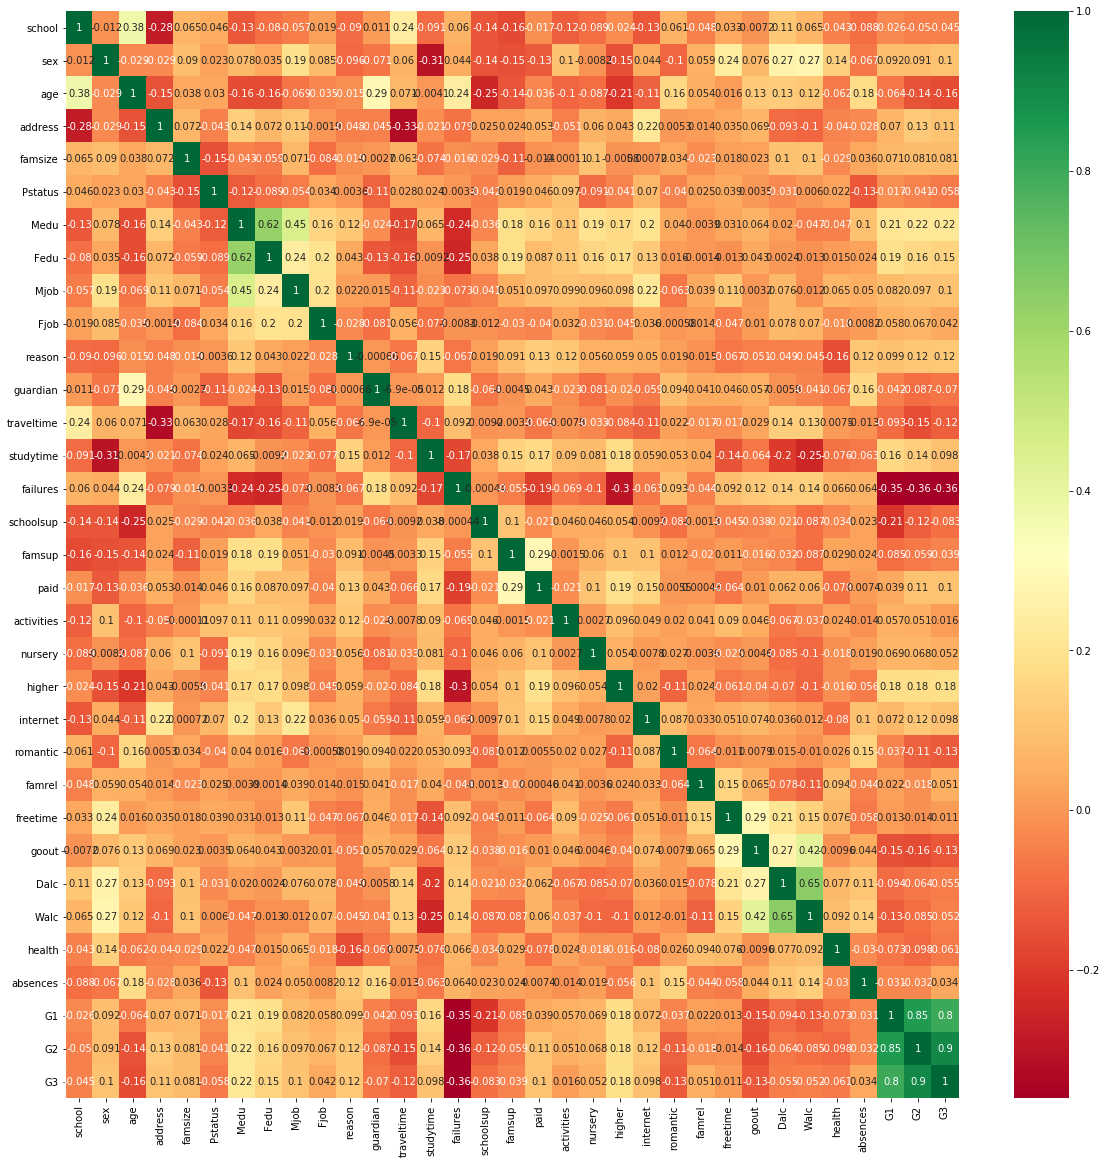

In [9]:
df = df_alunos
#get correlations of each features in dataset
#pearson
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

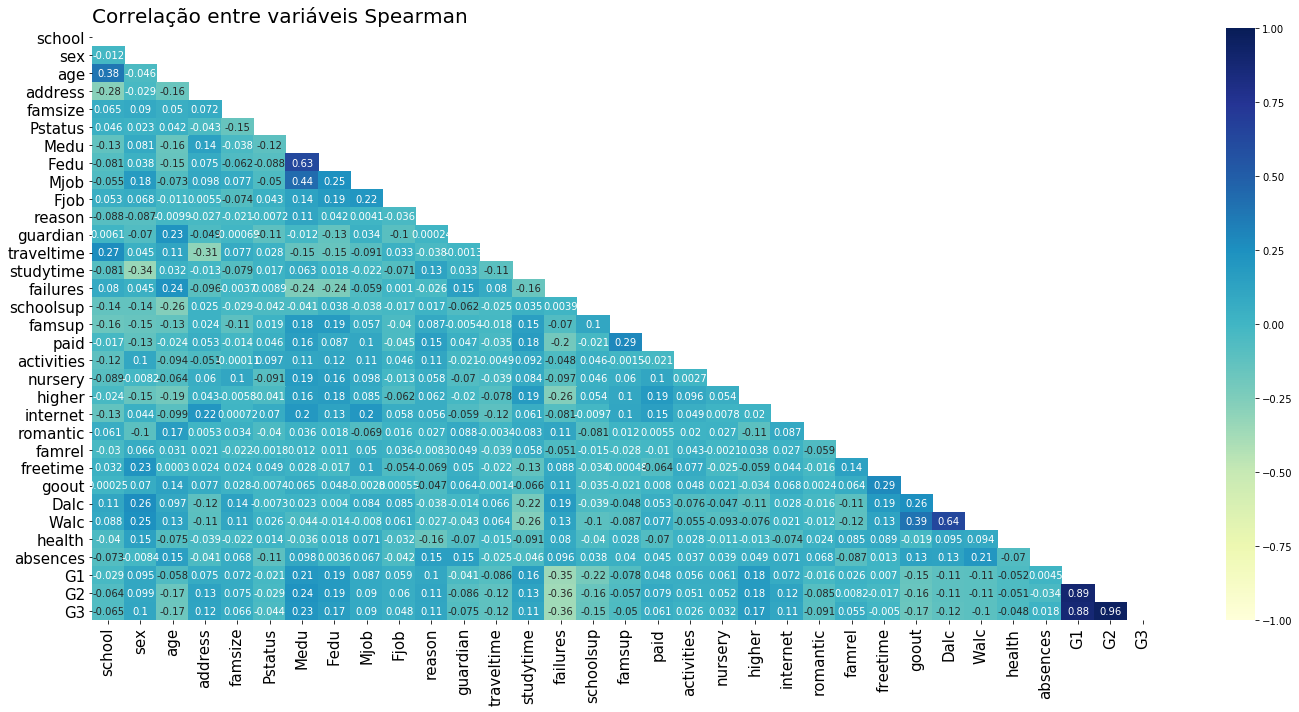

In [10]:
#sperman
plt.figure(figsize=(20,10))
corr = df_alunos.corr(method='spearman')
mask = np.triu(corr).astype(bool)
ax = sns.heatmap(corr, mask=mask, center=0, annot=True, vmax=1, vmin=-1, cmap="YlGnBu")
ticks = df_alunos.columns.values.tolist()
ax.set_yticklabels(ticks, rotation=0, fontsize=15)
ax.set_xticklabels(ticks, fontsize=15)
ax.set_title('Correlação entre variáveis Spearman', fontsize=20,loc='left')
plt.tight_layout()

# Análise exploratória de dados

## Tabela - Estatística Descritiva

In [61]:
'''
tabela utilizada na apresentação

df_alunos.describe().loc[:,['age','traveltime','absences','studytime','freetime','goout','Dalc','Walc',\
                           'G1', 'G2', 'G3', 'famrel']]   '
'''
df_alunos.describe()

school         sex         age     address     famsize     Pstatus  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     0.116456    0.473418   16.696203    0.777215    0.288608    0.896203   
std      0.321177    0.499926    1.276043    0.416643    0.453690    0.305384   
min      0.000000    0.000000   15.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000   16.000000    1.000000    0.000000    1.000000   
50%      0.000000    0.000000   17.000000    1.000000    0.000000    1.000000   
75%      0.000000    1.000000   18.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000   22.000000    1.000000    1.000000    1.000000   

             Medu        Fedu        Mjob        Fjob      reason    guardian  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     2.749367    2.521519    2.169620    2.281013    1.255696    0.853165   
std      1.094735    1.088201    1.227473    0.863542    1.208236    0.536684   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000    2.000000    2.000000    2.000000    0.000000    1.000000   
50%      3.000000    2.000000    2.000000    2.000000    1.000000    1.000000   
75%      4.000000    3.000000    3.000000    3.000000    3.000000    1.000000   
max      4.000000    4.000000    4.000000    4.000000    3.000000    2.000000   

       traveltime   studytime    failures   schoolsup      famsup        paid  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     1.448101    2.035443    0.334177    0.129114    0.612658    0.458228   
std      0.697505    0.839240    0.743651    0.335751    0.487761    0.498884   
min      1.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
50%      1.000000    2.000000    0.000000    0.000000    1.000000    0.000000   
75%      2.000000    2.000000    0.000000    0.000000    1.000000    1.000000   
max      4.000000    4.000000    3.000000    1.000000    1.000000    1.000000   

       activities     nursery      higher    internet    romantic      famrel  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     0.508861    0.794937    0.949367    0.832911    0.334177    3.944304   
std      0.500555    0.404260    0.219525    0.373528    0.472300    0.896659   
min      0.000000    0.000000    0.000000    0.000000    0.000000    1.000000   
25%      0.000000    1.000000    1.000000    1.000000    0.000000    4.000000   
50%      1.000000    1.000000    1.000000    1.000000    0.000000    4.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    5.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    5.000000   

         freetime       goout        Dalc        Walc      health    absences  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.235443    3.108861    1.481013    2.291139    3.554430    5.708861   
std      0.998862    1.113278    0.890741    1.287897    1.390303    8.003096   
min      1.000000    1.000000    1.000000    1.000000    1.000000    0.000000   
25%      3.000000    2.000000    1.000000    1.000000    3.000000    0.000000   
50%      3.000000    3.000000    1.000000    2.000000    4.000000    4.000000   
75%      4.000000    4.000000    2.000000    3.000000    5.000000    8.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000   75.000000   

               G1          G2          G3  
count  395.000000  395.000000  395.000000  
mean    10.908861   10.713924   10.415190  
std      3.319195    3.761505    4.581443  
min      3.000000    0.000000    0.000000  
25%      8.000000    9.000000    8.000000  
50%     11.000000   11.000000   11.000000  
75%     13.000000   13.000000   14.000000  
max     1

### Conclusão

Observando as 395 respostas dos alunos da escola "Todos Unidos", percebe-se que a idade média dos alunos é 16 anos, variando entre 15 a 22 anos, e tendo um tempo de viagem de casa até a escola de no mínimo 1 hora e no máximo 4 horas. Além disso, o número de faltas de escolas sendo em média, aproximadamente, 5.7, que possui um desvio padrão grande, 8.003096, os valores variam entre 0 a 75, e o nível educacional tanto da mãe quanto do pai desses alunos são em média entre o ensino fundamental ao ensino médio.

Outra análise retirada da tabela, a média do tempo de estudo semanal nos alunos dedicado ao estudo é aproximadamente 2 horas e a média de tempo livre depois da escola é considera intermediária, não sendo baixa nem alta. As respostas em relação a sair com amigos, foi parecida com ao tempo livre.

Em relação ao consumo de álcool em média dos estudantes da escola é, em média, maior no fim de semana do que durante o trabalho sendo considerado baixo e a saúde atual deles é intermediária.

Já as notas dos 395 do grau 1, grau2 e final, em média foram parecidas, sendo respectivmaente, 10.908861, 10.713924, 10.415190, é interessante ressaltar que as notas são equivalentes a 50%, aproximadamente, já que o reusltado varia entre 0 e 20. Considerando que o resultado para aprovação dos alunos seja 12, mais da metade dos alunos foram reprovados, já que a mediana é 11.

A maior média das respostas que eram para ser marcadas de 1 a 5 foi a da relação familar.

## Dashboards

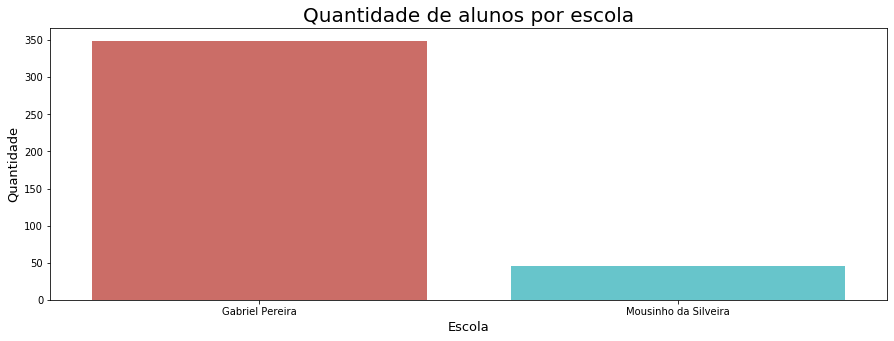

In [12]:
plt.figure(figsize=(15,5))
sns.countplot(x='school', data=df_alunos, palette='hls')
plt.title('Quantidade de alunos por escola', fontsize = 20)
plt.xlabel('Escola', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.xticks([0,1],['Gabriel Pereira','Mousinho da Silveira'])
plt.show()

### Conclusão

Conforme o gráfico "Quantidade de alunos por escola", apesar da consultoria ser para "Todos Unidos", os 395 alunos são dividos em duas escolas "Gabriel Pereira" e "Mousinho da Silveira", a distribuição dos estudantes para as instituições não é igual, a maioria dos alunos são da primeira escola citada.

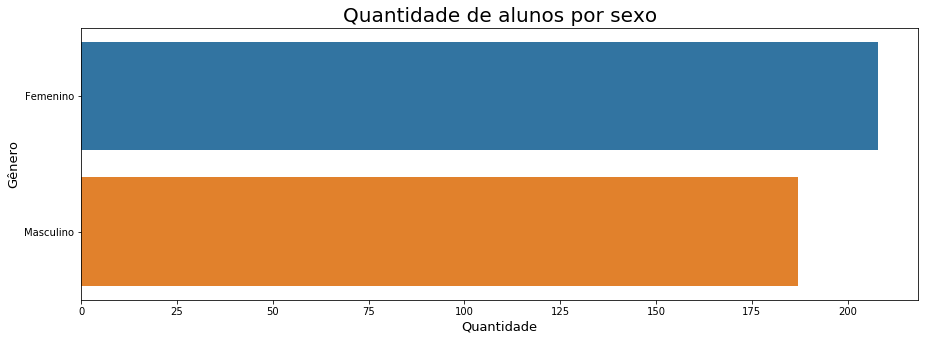

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(y='sex', data=df_alunos, palette='tab10')
plt.title('Quantidade de alunos por sexo', fontsize = 20)
plt.ylabel('Gênero', fontsize = 13)
plt.xlabel('Quantidade', fontsize = 13)
plt.yticks([0,1],['Femenino','Masculino'])
plt.show()

### Conclusão

Observando o dashboard "Quantidade de alunos por sexo" percebe-se que a divisão de gênero é bastante similar, existe apenas uma pequena diferença para mais alunos do sexo feminino.

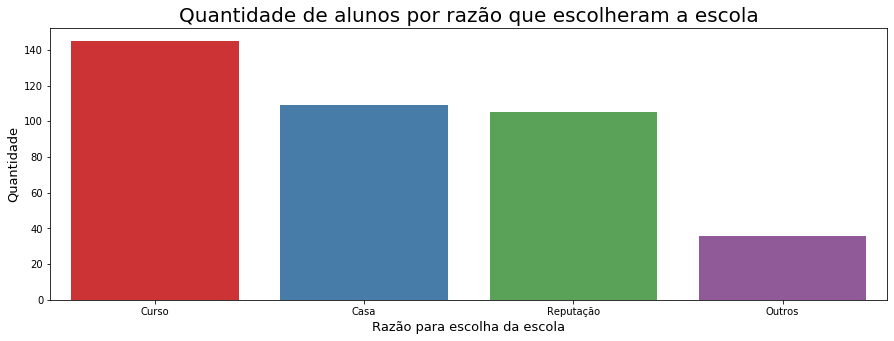

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(x='reason', data=df_alunos, palette='Set1', order = df_alunos['reason'].value_counts().index)
plt.title('Quantidade de alunos por razão que escolheram a escola', fontsize = 20)
plt.xlabel('Razão para escolha da escola', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.xticks([0,1,2,3],['Curso','Casa','Reputação', 'Outros'])
plt.show()

### Conclusão

A partir do gráfico "Quantidade de alunos por razão que escolheram a escola" conclui-se que a maioria das respostas pela razão das escolha foi pelo curso, além disso, a quantidade de alunos que optaram pela casa e reputação são parecidas, tendo apenas uma baixa quantidade para outros. Isso pode justificar alguns valores altos no tempo de viagem de casa até a escola de 25% dos dados, segundo a "Tabela - Estatística Descritiva".

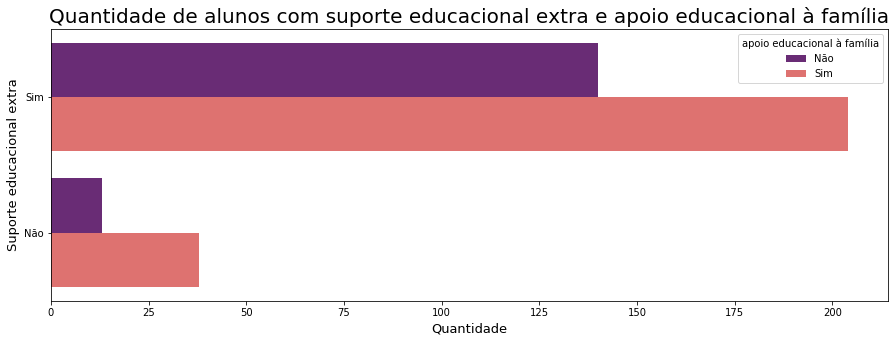

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(y='schoolsup', data=df_alunos, palette='magma', hue='famsup')
plt.title('Quantidade de alunos com suporte educacional extra e apoio educacional à família', fontsize = 20)
plt.ylabel('Suporte educacional extra', fontsize = 13)
plt.xlabel('Quantidade', fontsize = 13)
plt.yticks([0,1],['Sim','Não'])
plt.legend(title='apoio educacional à família', labels=['Não','Sim'])
plt.show()

### Conclusão

O dashboard "Quantidade de alunos com suporte educacional extra e apoio educacional à família" representa que muitos alunos não têm suporte educacional extra e essa variável aparenta não ter relação ao apoio educional à família, isso porque em ambos os casos de suporte existe uma maior taxa de apoio educional à família.

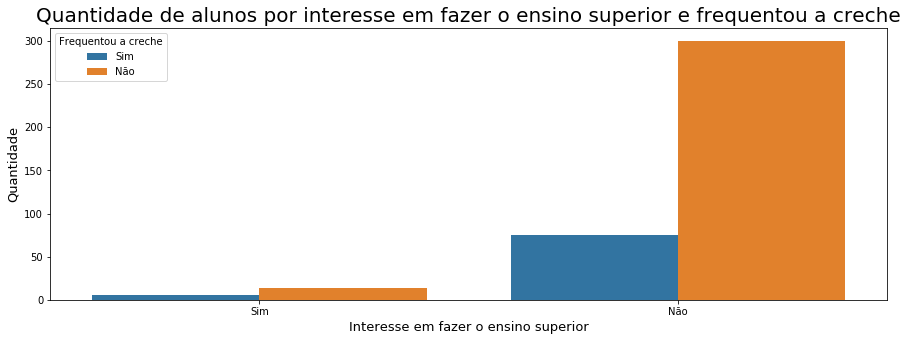

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(x='higher', data=df_alunos, palette='tab10', hue='nursery')
plt.title('Quantidade de alunos por interesse em fazer o ensino superior e frequentou a creche', fontsize = 20)
plt.xlabel('Interesse em fazer o ensino superior', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.xticks([0,1],['Sim','Não'])
plt.legend(title='Frequentou a creche', labels=['Sim', 'Não'])
plt.show()

### Conclusão

Segundo o gráfico "Quantidade de alunos por interesse em fazer o ensino superior e frequentou a creche", muitos alunos tem interesse em fazer o ensino superior e imagina-se que o fato de ter frequentado uma creche, em muitos casos, não interfere na decisão de continuar os estudos numa instituição.

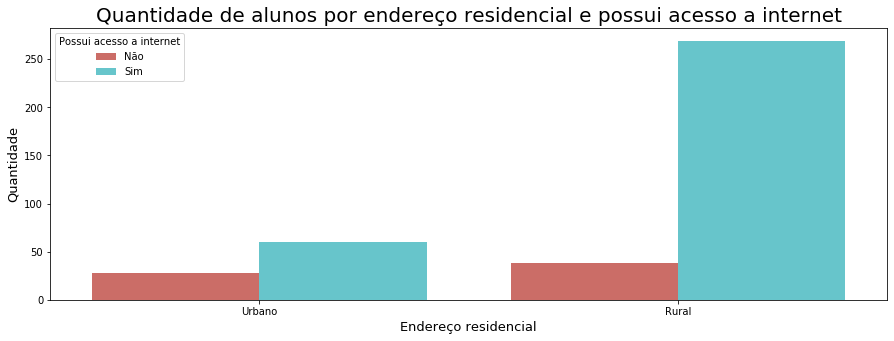

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(x='address', data=df_alunos, palette='hls', hue='internet')
plt.title('Quantidade de alunos por endereço residencial e possui acesso a internet', fontsize = 20)
plt.xlabel('Endereço residencial', fontsize = 13)
plt.ylabel('Quantidade', fontsize = 13)
plt.xticks([0,1],['Urbano','Rural'])
plt.legend(title='Possui acesso a internet', labels=['Não', 'Sim'])
plt.show()

### Conclusão

O dashboard "Quantidade de alunos por endereço residencial e possui acesso a internet" demonstra que muitos alunos residem no urbano e possuem internet, entretanto não existe uma proporção igual dos alunos rurais para os urbanos quanto a internet, pois a quantidade de alunos sem internet é parecida para os dois ambientes, mesmo a quantidade do rural ser próximo de 5 vezes menor que o urbano. Assim, parece que existe uma relação entre essas duas variáveis.

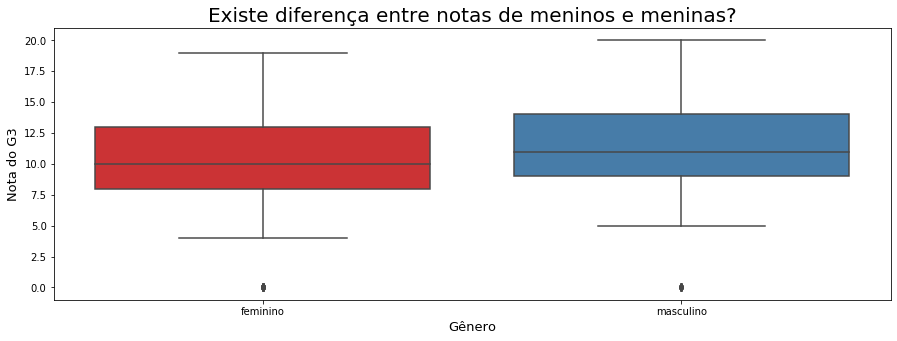

In [19]:
plt.figure(figsize=(15,5))
sns.boxplot(x = 'sex', y = 'G3', palette='Set1', data = df_alunos)
plt.title('Existe diferença entre notas de meninos e meninas?', fontsize = 20)
plt.xlabel('Gênero', fontsize = 13)
plt.ylabel('Nota do G3', fontsize = 13)
plt.xticks([0,1],['feminino','masculino'])
plt.show()

### Conclusão

Com o boxplot "Existe diferença entre notas de meninos e meninas?" conclui-se que os alunos do sexo masculino mostram um desempenho um pouco melhor nas notas do G3 do que o sexo feminino.

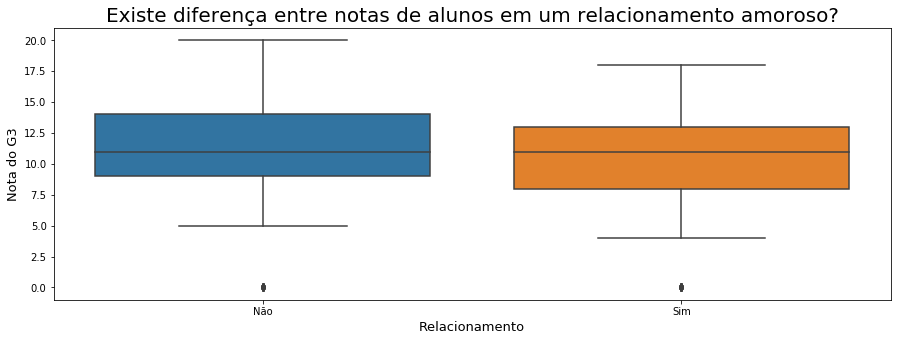

In [20]:
plt.figure(figsize=(15,5))
sns.boxplot(x = 'romantic', y = 'G3', palette='tab10', data = df_alunos)
plt.title('Existe diferença entre notas de alunos em um relacionamento amoroso?', fontsize = 20)
plt.xlabel('Relacionamento', fontsize = 13)
plt.ylabel('Nota do G3', fontsize = 13)
plt.xticks([0,1],['Não','Sim'])
plt.show()

### Conclusão

Analisando o dashboard "Existe diferença entre notas de alunos em um relacionamento amoroso?" percebe-se que os alunos que não estão em um relacionamento amoroso apresentam um melhor desempenho geral.

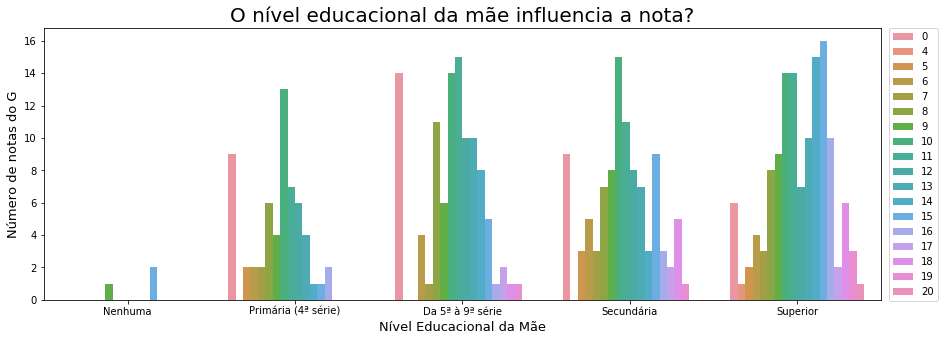

In [21]:
plt.figure(figsize=(15,5))
graf_mae = sns.countplot(x = df_alunos['Medu'], hue = df_alunos['G3'])
graf_mae.set_title('O nível educacional da mãe influencia a nota?', fontsize = 20)
graf_mae.set_xlabel('Nível Educacional da Mãe', fontsize = 13)
graf_mae.set_ylabel('Número de notas do G', fontsize = 13)
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0) #posiciona a legenda fóra da área de plotagem
graf_mae.set_xticks(range(5))
graf_mae.set_xticklabels(['Nenhuma', 'Primária (4ª série)', 'Da 5ª à 9ª série', 'Secundária', 'Superior'])
plt.show()

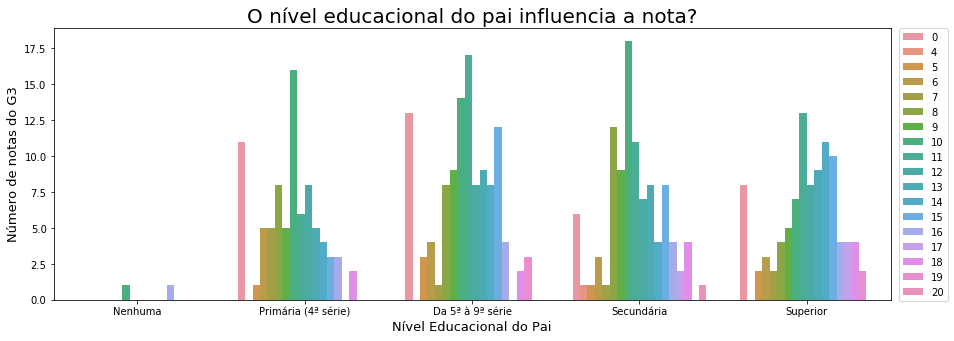

In [22]:
plt.figure(figsize=(15,5))
graf_pai = sns.countplot(x = df_alunos['Fedu'], hue = df_alunos['G3'])
graf_pai.set_title('O nível educacional do pai influencia a nota?', fontsize = 20)
graf_pai.set_xlabel('Nível Educacional do Pai', fontsize = 13)
graf_pai.set_ylabel('Número de notas do G3', fontsize = 13)
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0) #posiciona a legenda fóra da área de plotagem
graf_pai.set_xticks(range(5))
graf_pai.set_xticklabels(['Nenhuma', 'Primária (4ª série)', 'Da 5ª à 9ª série', 'Secundária', 'Superior'])
plt.show()

### Conclusão

Por meio dos gráficos "O nível educacional da mãe influencia a nota?" e "O nível educacional do pai influencia a nota?" deduz que a quantidade de notas mais altas tende a aumentar com o aumento do nível educacional dos pais.

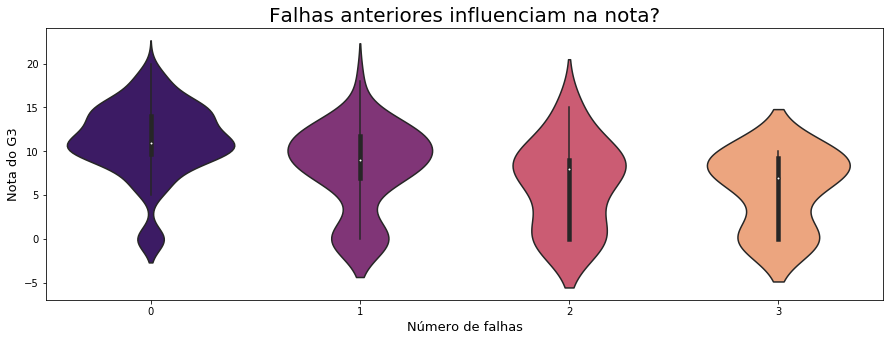

In [23]:
plt.figure(figsize=(15,5))
sns.violinplot(x = 'failures', y = 'G3', palette='magma', data = df_alunos)
plt.title('Falhas anteriores influenciam na nota?', fontsize = 20)
plt.xlabel('Número de falhas', fontsize = 13)
plt.ylabel('Nota do G3', fontsize = 13)
plt.show()

### Conclusão

De acordo com a visualização de dados "Falhas anteriores influenciam na nota?" observa-se que alunos com menos falhas apresentam notas mais altas.

# Curiosidade

Plot Violino: Mistura de boxplot com estimação de densidade. O objetivo do gráfico violin plot é o mesmo do que o boxplot original porém, considera de alguma maneira o comportamento dos dados dentro da caixa (box). Assim, percebemos melhor a distribuição dos dados dentro do intervalo interquartil.
Fonte: https://docs.ufpr.br/~lucambio/CE224/1S2015/Boxplot.pdf


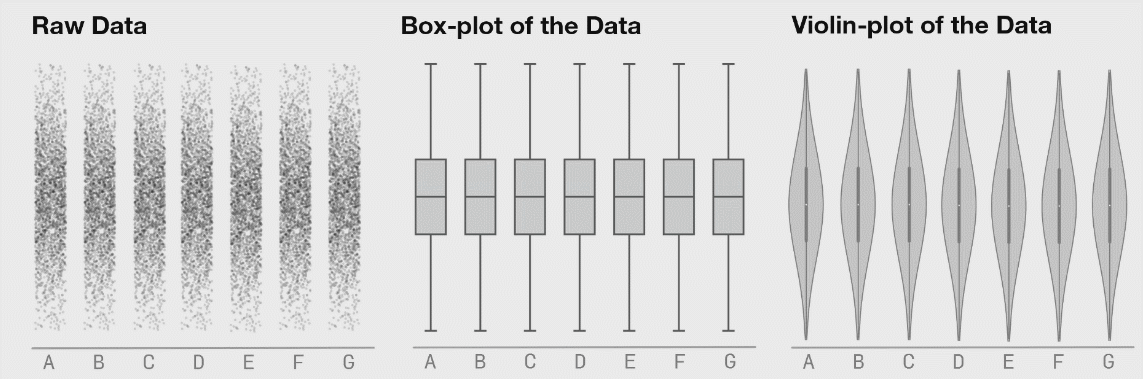

Fonte: https://towardsdatascience.com/violin-plots-explained-fb1d115e023d